# Loading Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from IPython.display import display
from utils import (
    clip_outliers,
    manage_data,
    plot_time_series,
    plot_monthly_trends,
    plot_correlation_heatmap,
    plot_scatter,
)


warnings.filterwarnings("ignore")

# Loading Data

In [2]:
data_path = 'data'

manage_data(data_path)


benin_malaniville_data = pd.read_csv(f'{data_path}/benin-malanville.csv', date_parser=['Timestamp'])
sierra_leone_bumbuna_data = pd.read_csv(f'{data_path}/sierraleone-bumbuna.csv', date_parser=['Timestamp'])
togo_dapaong_data = pd.read_csv(f'{data_path}/togo-dapaong_qc.csv', date_parser=['Timestamp'])


names = ['Benin Malanville', 'Sierra Leone Bumbuna', 'Togo Dapaong']

# Explanatory Data Analysis

## Exploring the data

In [3]:
display(
    "Benin Malaniville Data",
    benin_malaniville_data.head(),
    "Sierra Leone Bumbuna Data",
    sierra_leone_bumbuna_data.head(),
    "Togo Dapaong Data",
    togo_dapaong_data.head()
)

'Benin Malaniville Data'

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


'Sierra Leone Bumbuna Data'

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


'Togo Dapaong Data'

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
# The size of the datasets
display(
    "Benin Malaniville Data",
    benin_malaniville_data.shape,
    "Sierra Leone Bumbuna Data",
    sierra_leone_bumbuna_data.shape,
    "Togo Dapaong Data",
    togo_dapaong_data.shape
)

'Benin Malaniville Data'

(525600, 19)

'Sierra Leone Bumbuna Data'

(525600, 19)

'Togo Dapaong Data'

(525600, 19)

Each of the datasets contain 19 columns and 525,600 rows

Description for the column names

- GHI (W/m²): Global Horizontal Irradiance, the total solar radiation received per square meter on a horizontal surface.
- DNI (W/m²): Direct Normal Irradiance, the amount of solar radiation received per square meter on a surface perpendicular to the rays of the sun.
- DHI (W/m²): Diffuse Horizontal Irradiance, solar radiation received per square meter on a horizontal surface that does not arrive on a direct path from the sun.
- ModA (W/m²): Measurements from a module or sensor (A), similar to irradiance.
- ModB (W/m²): Measurements from a module or sensor (B), similar to irradiance.
- Tamb (°C): Ambient Temperature in degrees Celsius.
- RH (%): Relative Humidity as a percentage of moisture in the air.
- WS (m/s): Wind Speed in meters per second.
- WSgust (m/s): Maximum Wind Gust Speed in meters per second.
- WSstdev (m/s): Standard Deviation of Wind Speed, indicating variability.
- WD (°N (to east)): Wind Direction in degrees from north.
- WDstdev: Standard Deviation of Wind Direction, showing directional variability.
- BP (hPa): Barometric Pressure in hectopascals.
- Cleaning (1 or 0): Signifying whether cleaning (possibly of the modules or sensors) occurred.
- Precipitation (mm/min): Precipitation rate measured in millimeters per minute.
- TModA (°C): Temperature of Module A in degrees Celsius.
- TModB (°C): Temperature of Module B in degrees Celsius.
- Comments: This column is designed for any additional notes.


In [5]:
# Identify for the time span where the data was collected
for data in [benin_malaniville_data, sierra_leone_bumbuna_data, togo_dapaong_data]:
    print(f"Data collected from {data.Timestamp.min()} to {data.Timestamp.max()}")

Data collected from 2021-08-09 00:01 to 2022-08-09 00:00
Data collected from 2021-10-30 00:01 to 2022-10-30 00:00
Data collected from 2021-10-25 00:01 to 2022-10-25 00:00


In [6]:
# Identify the numerical and categorical columns
for i, data in enumerate([benin_malaniville_data, sierra_leone_bumbuna_data, togo_dapaong_data]):
    print(f"\n\nData: {names[i]}")
    print(f"Numerical columns: {data.select_dtypes(include=[np.number]).columns}")
    print(f"Categorical columns: {data.select_dtypes(include=['object', 'category']).columns}")



Data: Benin Malanville
Numerical columns: Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')
Categorical columns: Index(['Timestamp'], dtype='object')


Data: Sierra Leone Bumbuna
Numerical columns: Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')
Categorical columns: Index(['Timestamp'], dtype='object')


Data: Togo Dapaong
Numerical columns: Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')
Categorical columns: Index(['Timestamp'], dtype='object')


All columns other than "Timestamp" and "Comment" seem to be numerical

## Summary Statistics:

In [7]:
numerical_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB']


# Calculate the mean, median, standard deviation, and other statistical measures for each numeric
# column to understand data distribution.
for i, data in enumerate([benin_malaniville_data, sierra_leone_bumbuna_data, togo_dapaong_data]):
    print(f"Data statistics for {names[i]}")
    display(data.describe())

Data statistics for Benin Malanville


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


Data statistics for Sierra Leone Bumbuna


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


Data statistics for Togo Dapaong


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


From the provided statistical summary, the following conclusions can be drawn:

1. **Central Tendency and Distribution**:
   - The mean and median values for most variables are relatively close, indicating a fairly symmetrical distribution for some variables. However, for highly variable metrics like solar irradiance (GHI, DNI, DHI), the large standard deviation suggests significant fluctuations, potentially influenced by time of day or weather conditions.

2. **Variability and Range**:
   - High standard deviations for variables such as irradiance (GHI, DNI, DHI) and module outputs (ModA, ModB) imply wide fluctuations over the recorded period.
   - Some variables, like wind gusts (WSgust) and wind direction standard deviation (WDstdev), also show variability but to a lesser extent.

3. **Outliers and Potential Anomalies**:
   - Negative minimum values in solar irradiance metrics may indicate sensor errors or nighttime readings being recorded as negatives.
   - Precipitation and cleaning have very low mean values, suggesting infrequent occurrences.

The data highlights variability across time-sensitive and weather-dependent metrics, suggesting the need for robust data handling to accommodate outliers and variability in analyses.

## Data Quality Check

### Missing values

In [8]:
#  Look for missing values in the datasets

for i, data in enumerate([benin_malaniville_data, sierra_leone_bumbuna_data, togo_dapaong_data]):
    print(f"Missing values in {names[i]}")
    display(data.isnull().sum())

Missing values in Benin Malanville


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing values in Sierra Leone Bumbuna


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing values in Togo Dapaong


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

The Comments column doesn't have any value, so it is better to remove it.

In [9]:
# remove the "Comments" column

benin_malaniville_data = benin_malaniville_data.drop(columns=['Comments'])
sierra_leone_bumbuna_data = sierra_leone_bumbuna_data.drop(columns=['Comments'])
togo_dapaong_data = togo_dapaong_data.drop(columns=['Comments'])


Outliers in Benin Malanville


<Axes: >

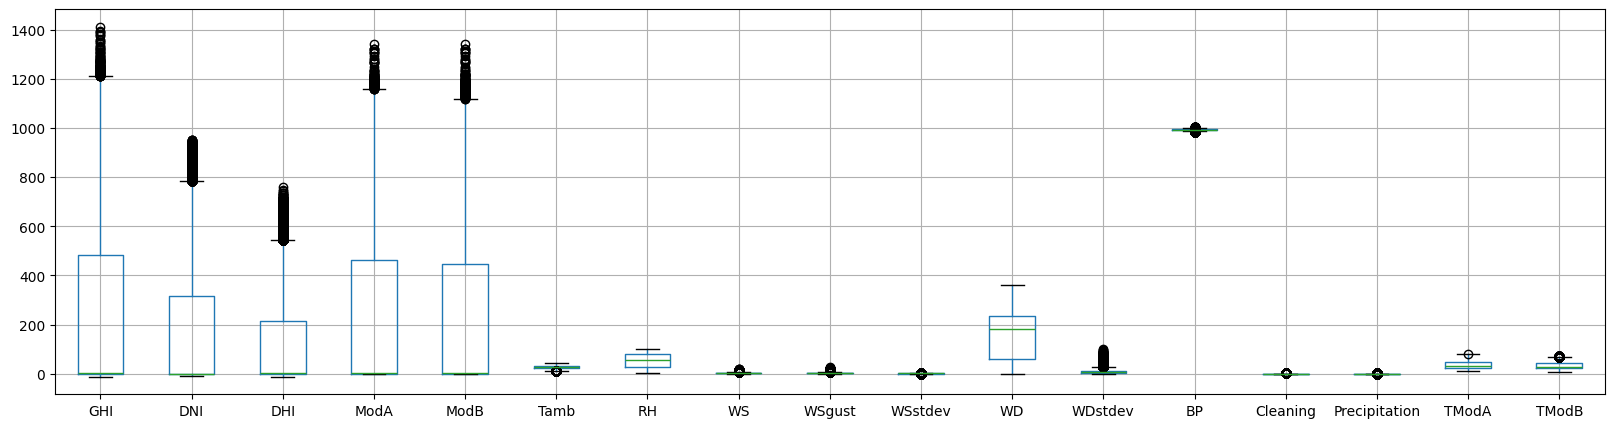

Outliers in Sierra Leone Bumbuna


<Axes: >

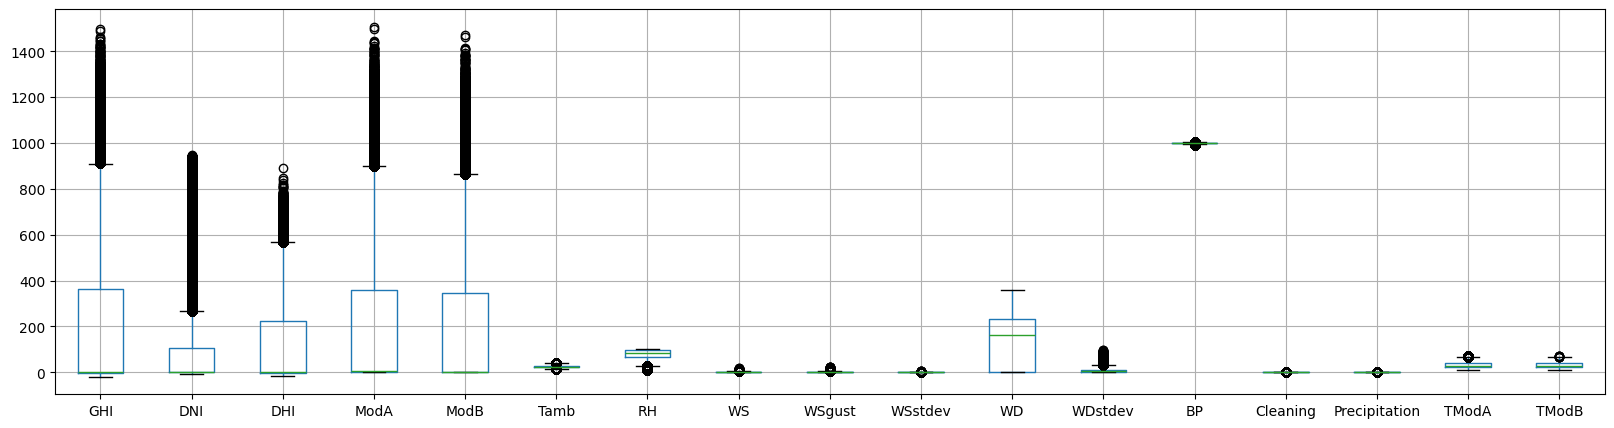

Outliers in Togo Dapaong


<Axes: >

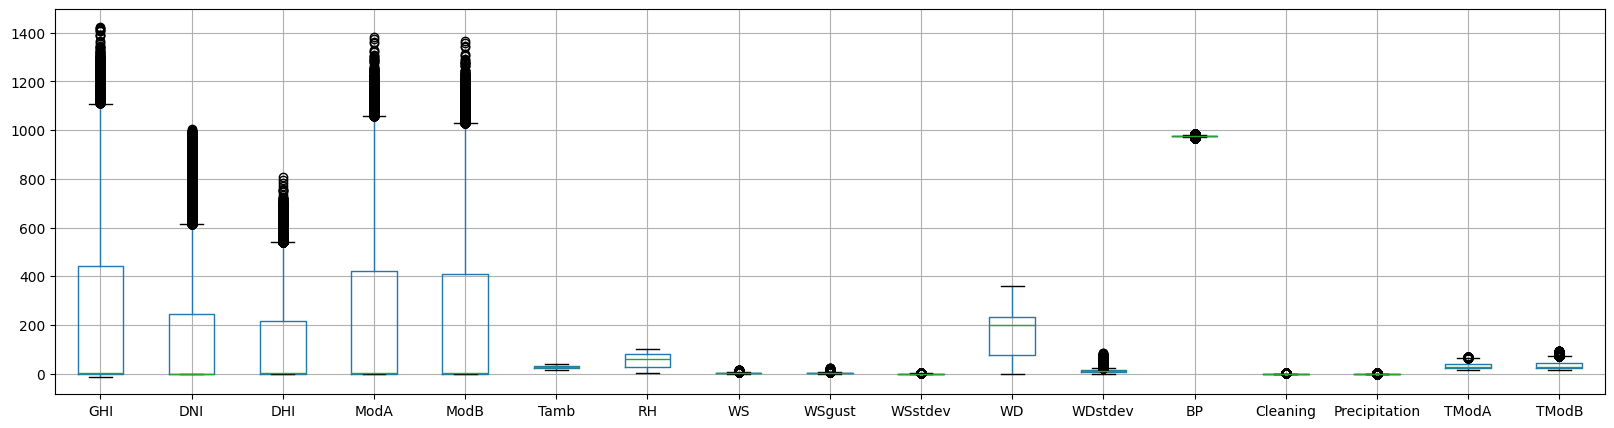

In [10]:
# check for outliers in the datasets by using box plots

for i, data in enumerate([benin_malaniville_data, sierra_leone_bumbuna_data, togo_dapaong_data]):
    print(f"Outliers in {names[i]}")
    display(data[numerical_columns].boxplot(figsize=(20, 5)))
    plt.show()

Variables such as GHI, DNI, DHI, ModA, and ModB have a significant number of outliers, as indicated by the many points above their upper whiskers. Other variables like RH (Relative Humidity) and WD (Wind Direction) also show some outliers, though they are fewer.

---

**1. Global Horizontal Irradiance (GHI, W/m²)**
   - **Typical Range**:
     - Night: 0
     - Early morning/late evening: 0-200
     - Clear sky during midday: 600-100
     - Maximum recorded under ideal conditions: 1400
   - **Outliers**:
     - Negative values are non-physical, possibly sensor errors.
     - Values above 1400 are rare and could arise due to reflection or faulty calibration.

**2. Direct Normal Irradiance (DNI, W/m²)**
   - **Typical Range**:
     - Night: 0
     - Cloudy/overcast sky: 0-300
     - Clear sunny day: 500-800
     - Peak under clear sky at midday: 900-1000
   - **Outliers**:
     - Negative values are impossible and indicate sensor issues.
     - Values above 1000 can occur with intense sunlight or miscalibration.

**3. Diffuse Horizontal Irradiance (DHI, W/m²)**
   - **Typical Range**:
     - Clear sky: 0-200
     - Overcast conditions: 200-400
     - Maximum: 500-600
   - **Outliers**:
     - Negative values are not physical.
     - Values above 600 are rare but possible with high atmospheric scattering.

**4. Module A and B Measurements (ModA, ModB, W/m²)**
   - **Typical Range**:
     - Likely similar to GHI or DNI, depending on how modules are positioned.
     - 0-1000
   - **Outliers**:
     - Very high values  > 1300 may result from misaligned sensors or unusual conditions (e.g., reflective surroundings).

**5. Relative Humidity (RH, %)**
   - **Typical Range**:
     - Arid/desert regions: 10-30%.
     - Temperate zones: 30-70%.
     - Humid/tropical areas: 70-100%.
   - **Outliers**:
     - Values outside 0-100 are invalid (sensor/calculation errors).

**6. Wind Direction (WD, °N to °E)**
   - **Typical Range**:
     - 0-360°, where 0° is north, 90° is east.
     - Values outside this range are not physical and indicate errors.

In [11]:
potetial_colums_with_outliers = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'RH', 'WD']
valid_range = [
    (0, 1500), # GHI
    (0, 1500), # DNI
    (0, 1500), # DHI
    (0, 1500), # ModA
    (0, 1500), # ModB
    (0, 100), # RH
    (0, 360) # WD
]

# check the outliers based on the valid range
for i, data in enumerate([benin_malaniville_data, sierra_leone_bumbuna_data, togo_dapaong_data]):
    print(f"Outliers in {names[i]}")
    for col, (min_val, max_val) in zip(potetial_colums_with_outliers, valid_range):
        print(f"{col} - {names[i]}")
        print(f"Number of outliers: {data[(data[col] < min_val) | (data[col] > max_val)].shape[0]}")
    print("\n")


Outliers in Benin Malanville
GHI - Benin Malanville
Number of outliers: 258847
DNI - Benin Malanville
Number of outliers: 275987
DHI - Benin Malanville
Number of outliers: 259182
ModA - Benin Malanville
Number of outliers: 0
ModB - Benin Malanville
Number of outliers: 0
RH - Benin Malanville
Number of outliers: 0
WD - Benin Malanville
Number of outliers: 0


Outliers in Sierra Leone Bumbuna
GHI - Sierra Leone Bumbuna
Number of outliers: 261135
DNI - Sierra Leone Bumbuna
Number of outliers: 266352
DHI - Sierra Leone Bumbuna
Number of outliers: 263128
ModA - Sierra Leone Bumbuna
Number of outliers: 1
ModB - Sierra Leone Bumbuna
Number of outliers: 0
RH - Sierra Leone Bumbuna
Number of outliers: 0
WD - Sierra Leone Bumbuna
Number of outliers: 0


Outliers in Togo Dapaong
GHI - Togo Dapaong
Number of outliers: 257385
DNI - Togo Dapaong
Number of outliers: 0
DHI - Togo Dapaong
Number of outliers: 0
ModA - Togo Dapaong
Number of outliers: 0
ModB - Togo Dapaong
Number of outliers: 0
RH - Togo

Outliers in Benin Malanville


<Axes: >

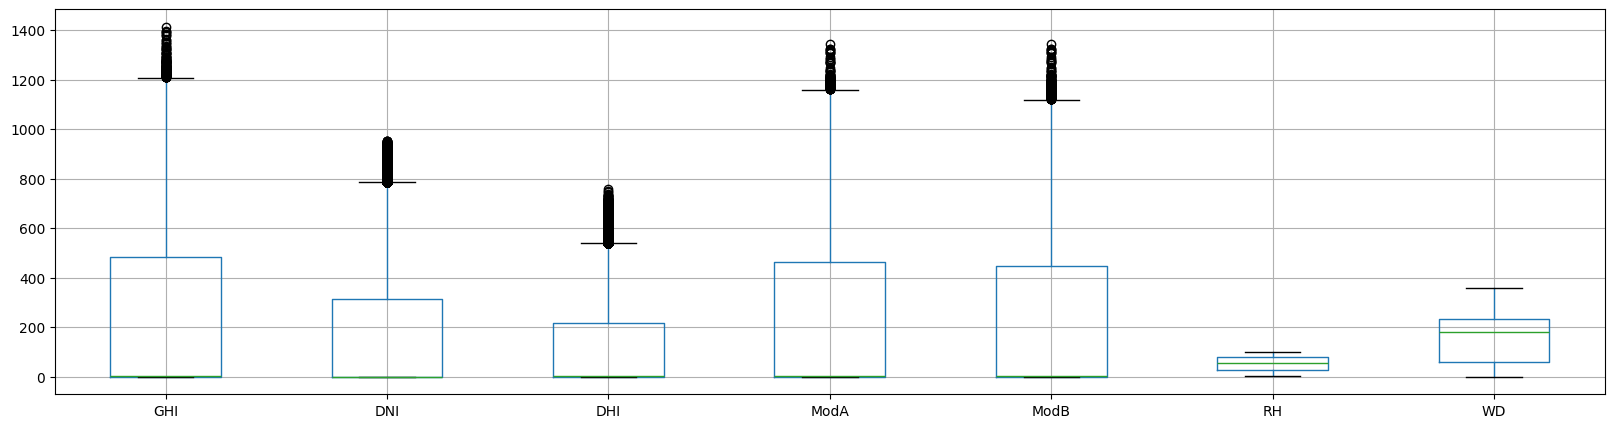

Outliers in Sierra Leone Bumbuna


<Axes: >

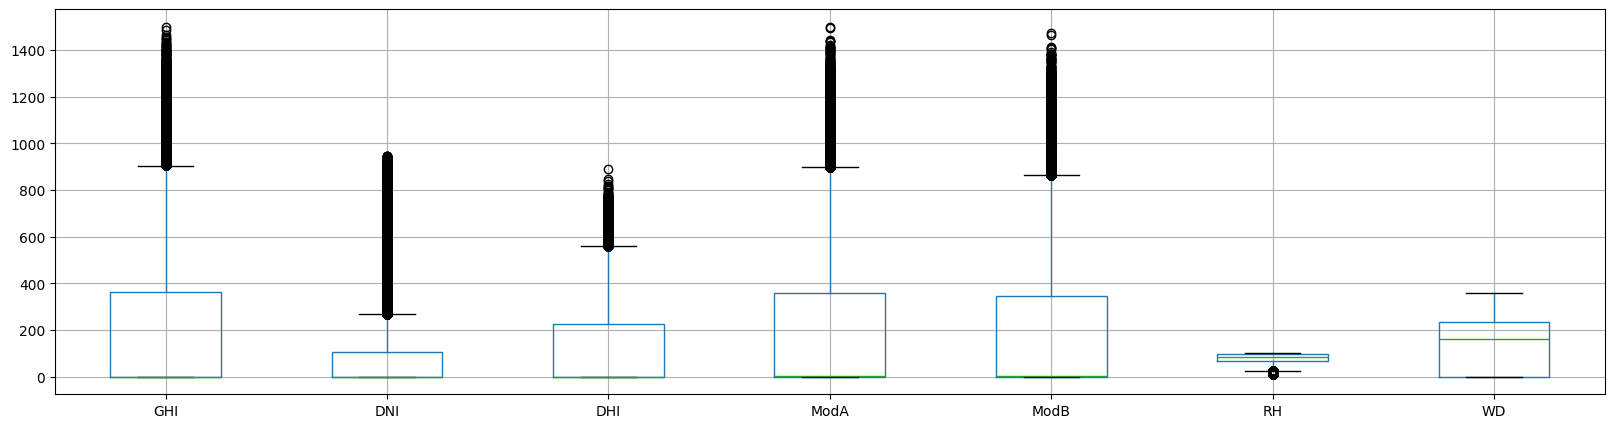

Outliers in Togo Dapaong


<Axes: >

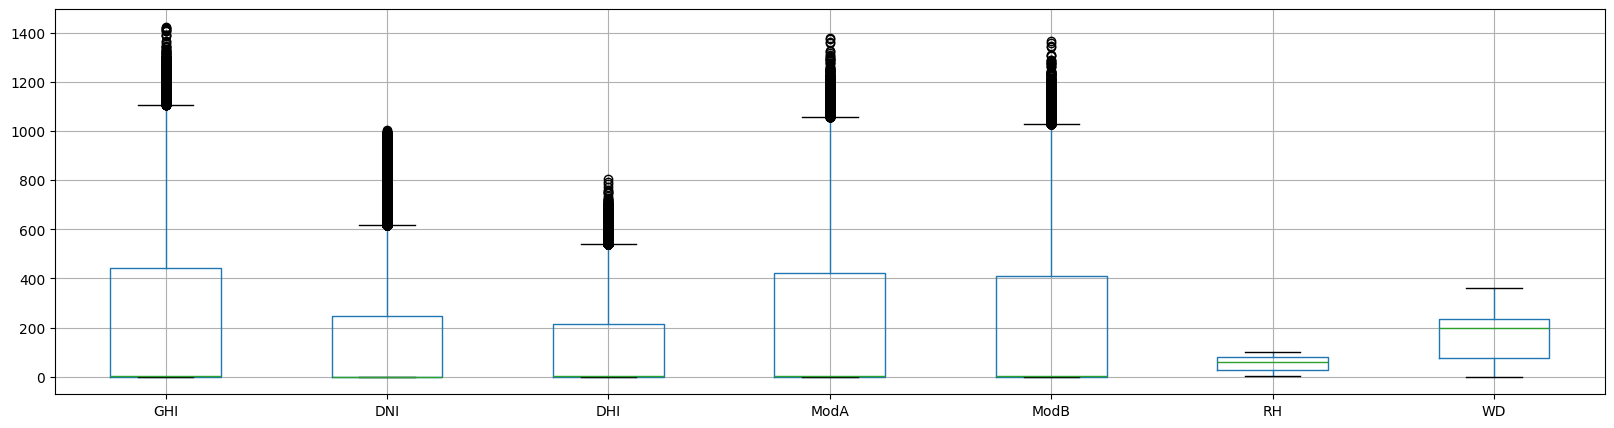

In [12]:
# clipping the outliers based on the valid range

benin_malaniville_data = clip_outliers(benin_malaniville_data, potetial_colums_with_outliers, valid_range)
sierra_leone_bumbuna_data = clip_outliers(sierra_leone_bumbuna_data, potetial_colums_with_outliers, valid_range)
togo_dapaong_data = clip_outliers(togo_dapaong_data, potetial_colums_with_outliers, valid_range)

# display the box plot after removing the outliers
for i, data in enumerate([benin_malaniville_data, sierra_leone_bumbuna_data, togo_dapaong_data]):
    print(f"Outliers in {names[i]}")
    display(data[potetial_colums_with_outliers].boxplot(figsize=(20, 5)))
    plt.show()

The outliers are now somehow reduced.

## Time Series Analysis:

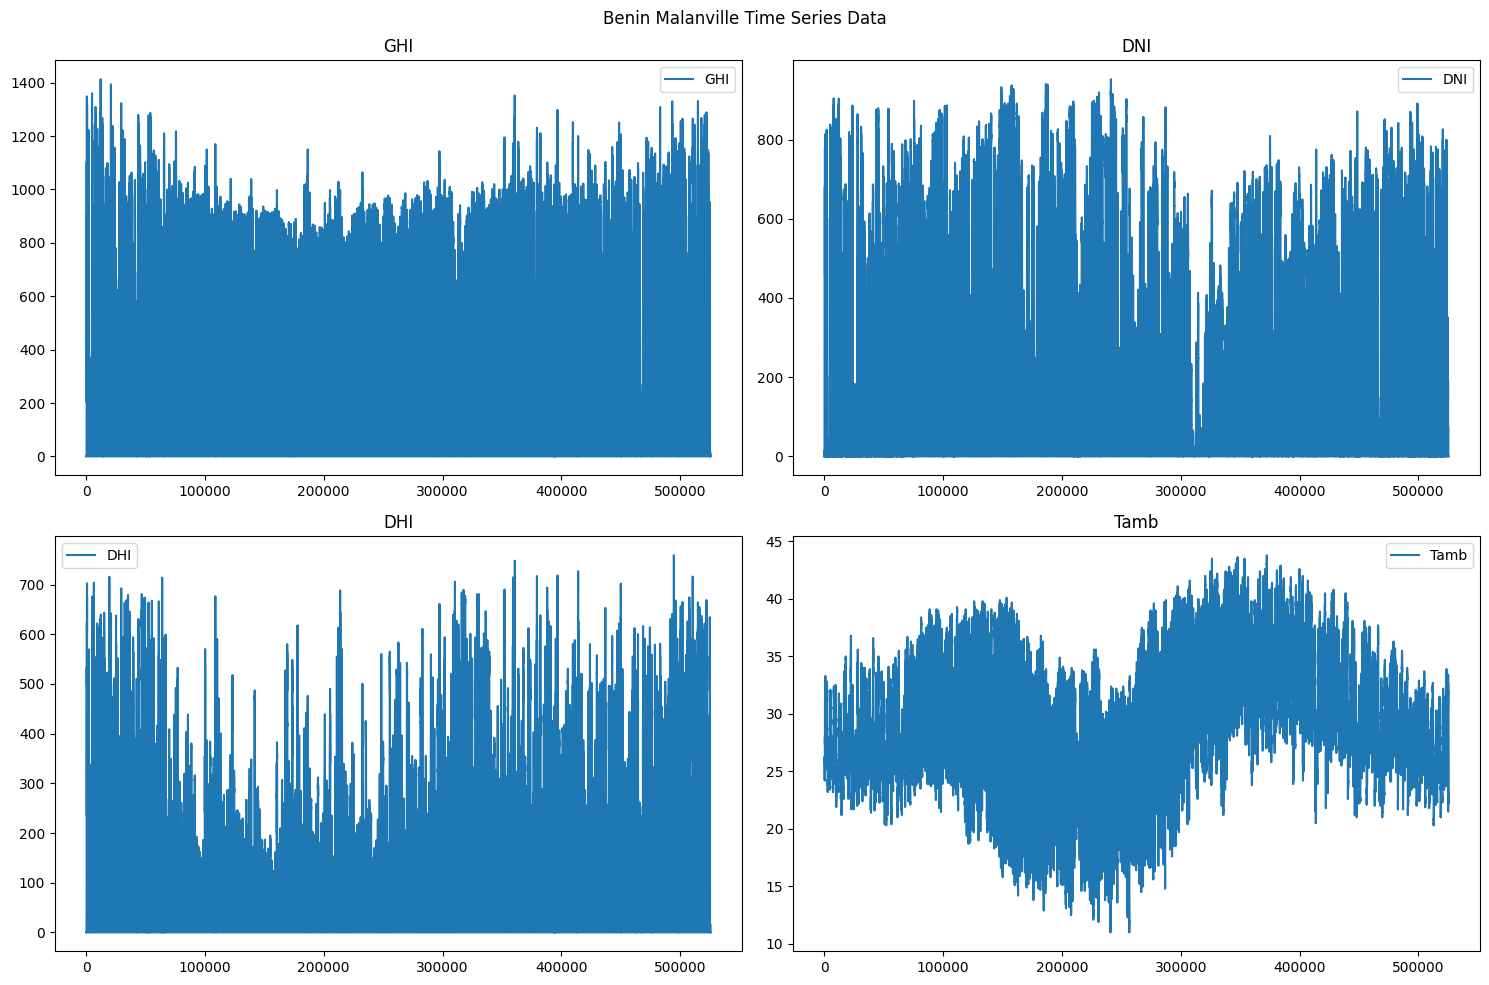

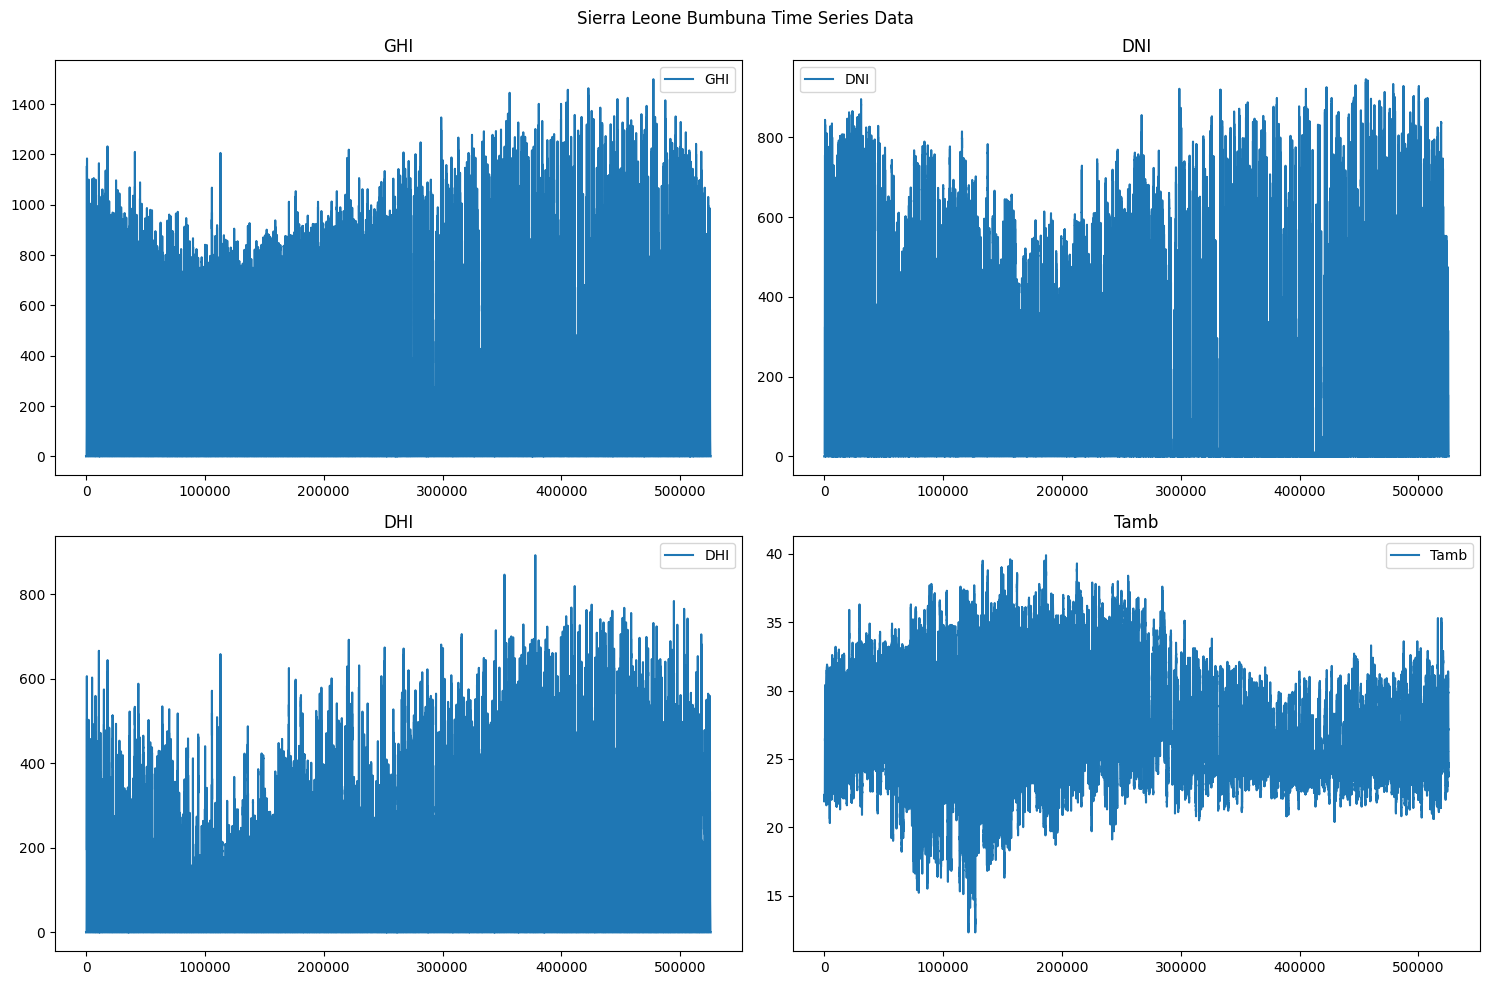

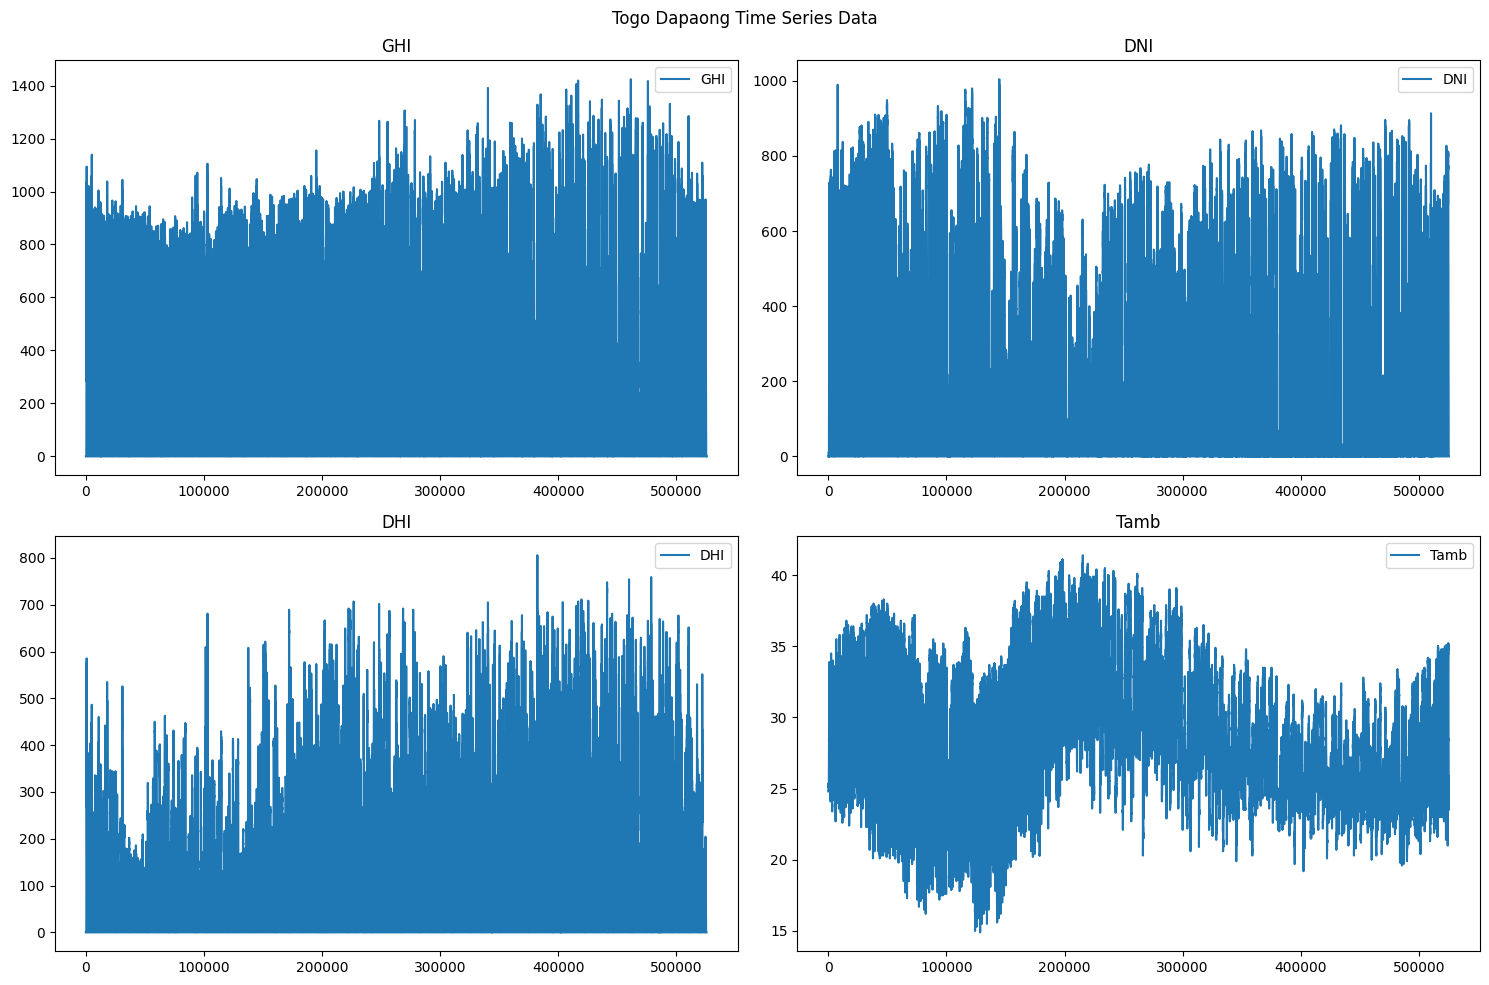

In [13]:
# Plot bar charts  of GHI, DNI, DHI, and Tamb over time to observe patterns by month, 
# trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 

plot_time_series(benin_malaniville_data, ['GHI', 'DNI', 'DHI', 'Tamb'], 'Benin Malanville')
plot_time_series(sierra_leone_bumbuna_data, ['GHI', 'DNI', 'DHI', 'Tamb'], 'Sierra Leone Bumbuna')
plot_time_series(togo_dapaong_data, ['GHI', 'DNI', 'DHI', 'Tamb'], 'Togo Dapaong')

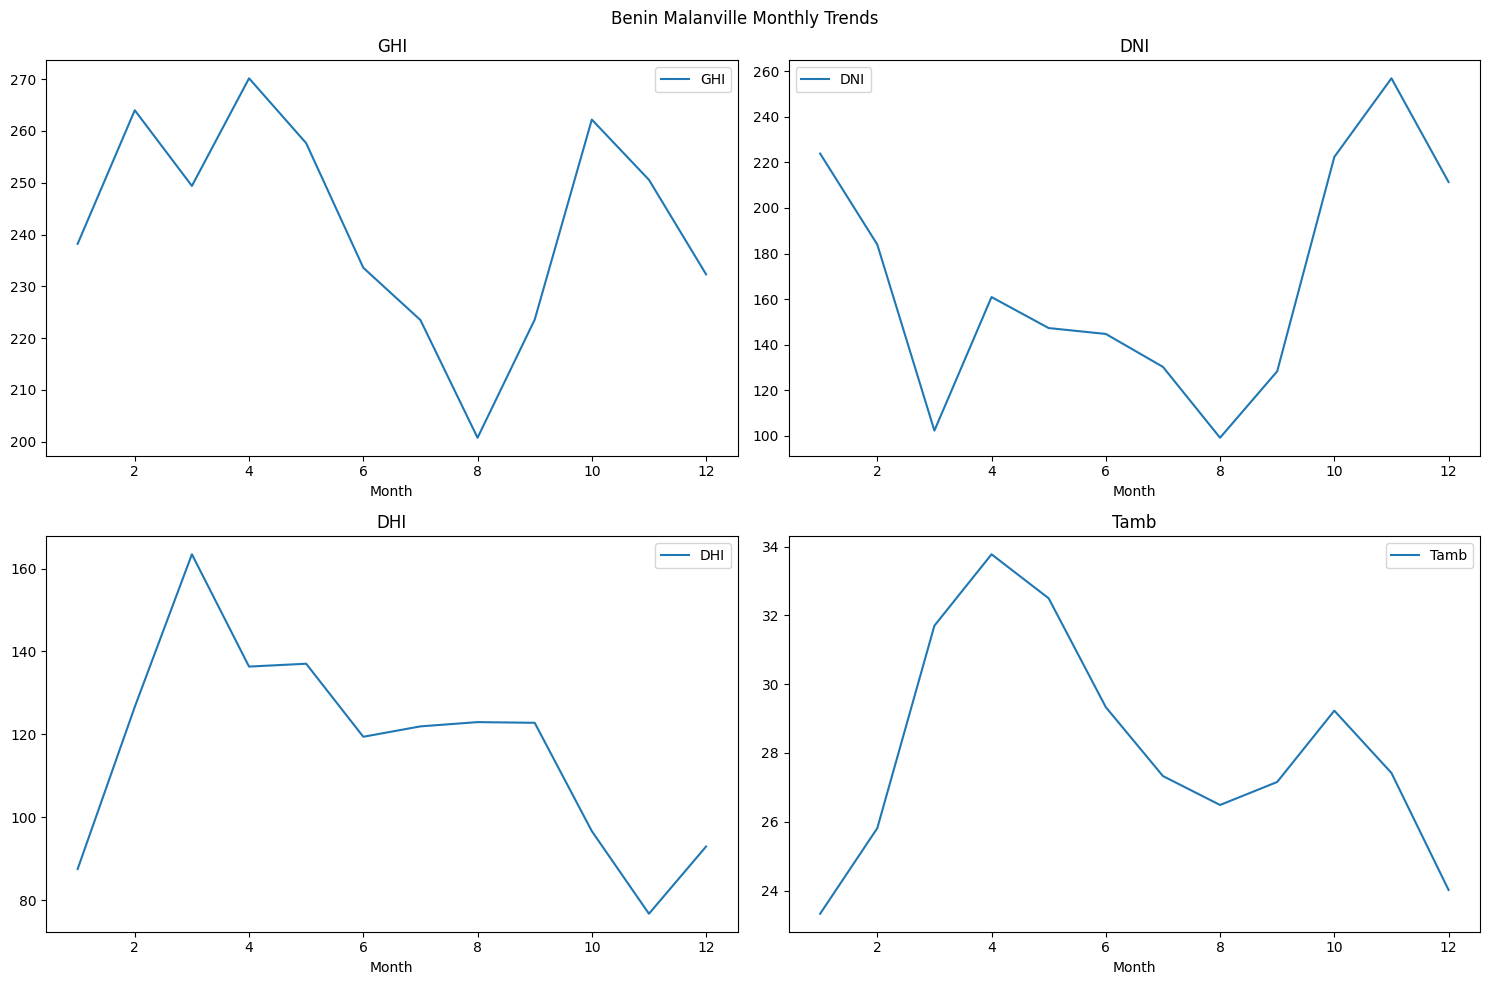

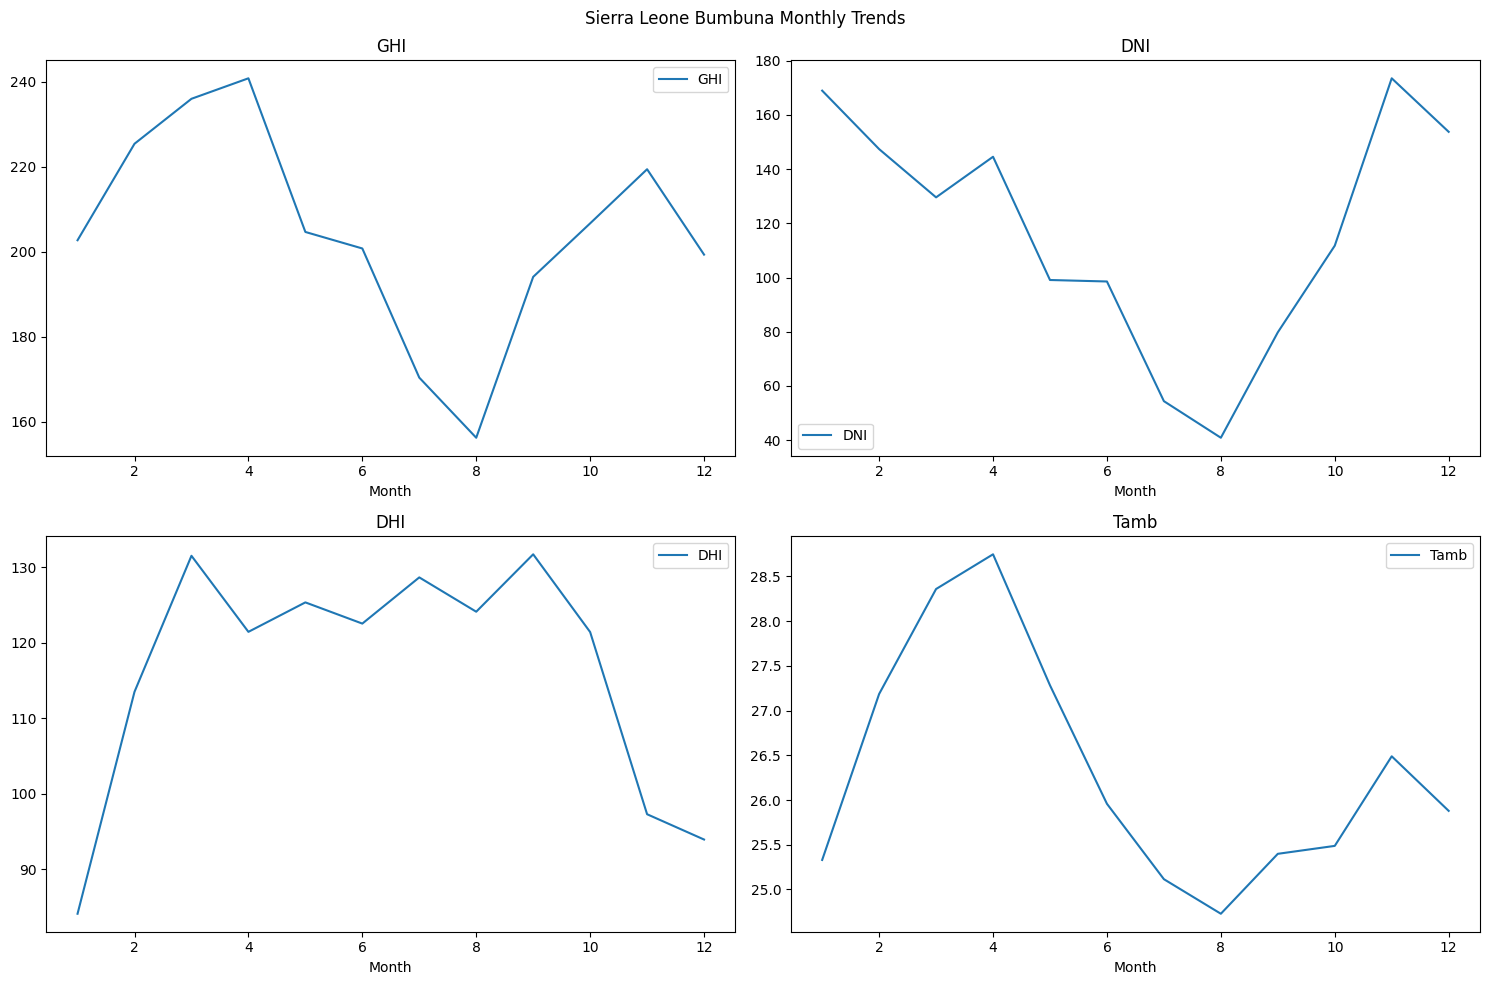

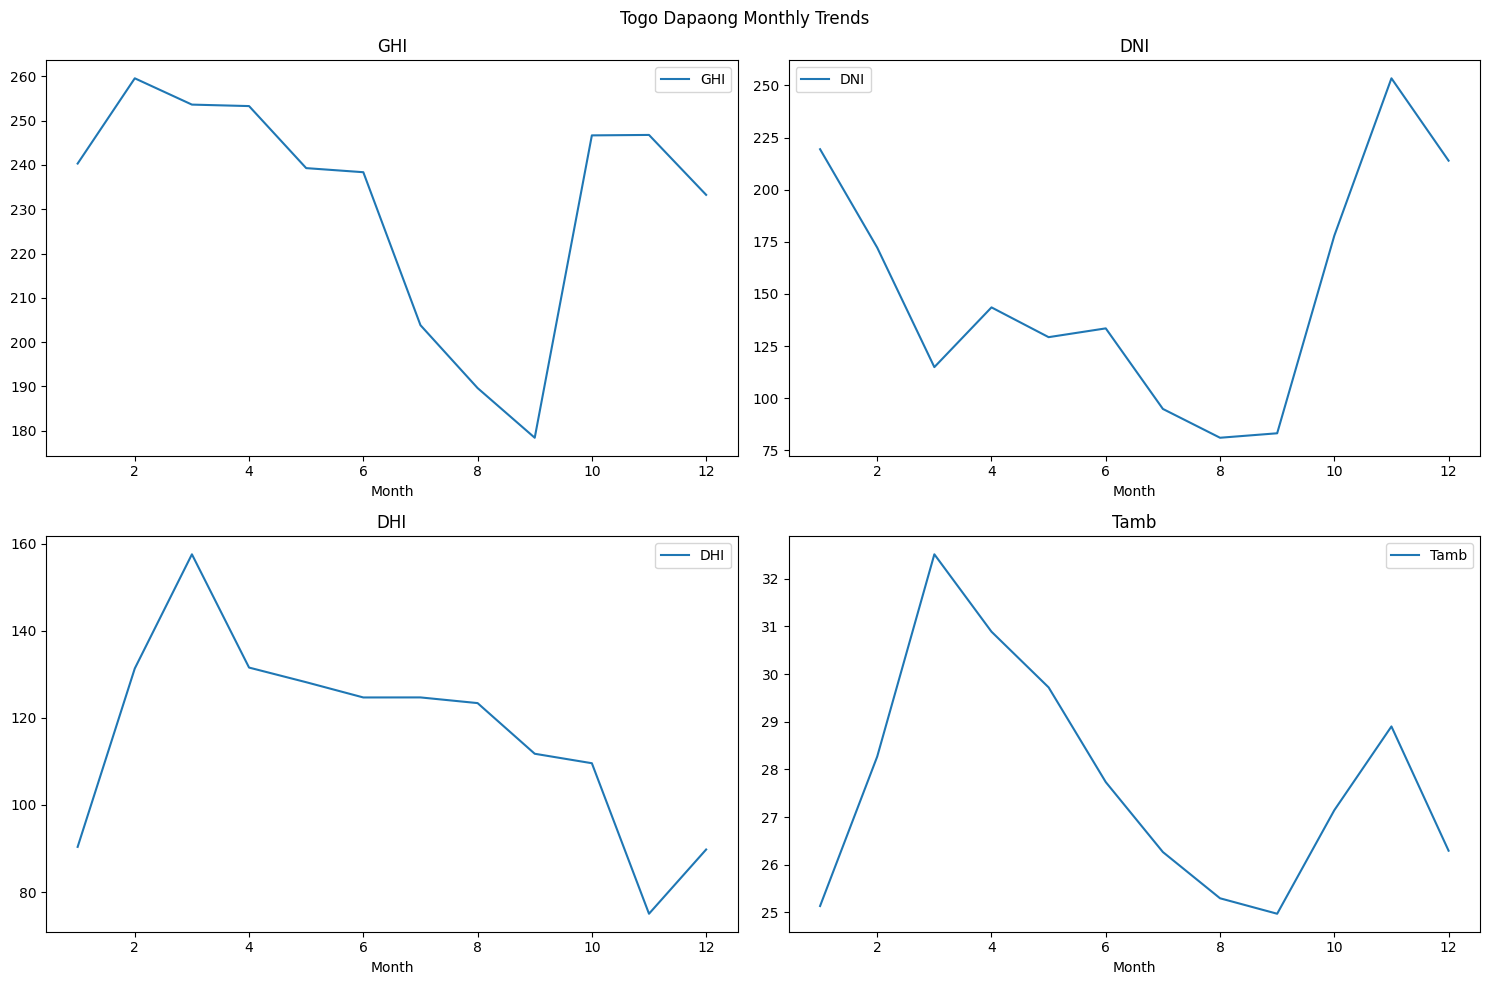

In [14]:
# Patterns by month

# Make sure the Timestamp column is in the correct format
benin_malaniville_data['Timestamp'] = pd.to_datetime(benin_malaniville_data['Timestamp'])
sierra_leone_bumbuna_data['Timestamp'] = pd.to_datetime(sierra_leone_bumbuna_data['Timestamp'])
togo_dapaong_data['Timestamp'] = pd.to_datetime(togo_dapaong_data['Timestamp'])


plot_monthly_trends(benin_malaniville_data, ['GHI', 'DNI', 'DHI', 'Tamb'], 'Benin Malanville')
plot_monthly_trends(sierra_leone_bumbuna_data, ['GHI', 'DNI', 'DHI', 'Tamb'], 'Sierra Leone Bumbuna')
plot_monthly_trends(togo_dapaong_data, ['GHI', 'DNI', 'DHI', 'Tamb'], 'Togo Dapaong')

## Correlation Analysis:

### correlations between solar radiation components (GHI, DNI, DHI) 

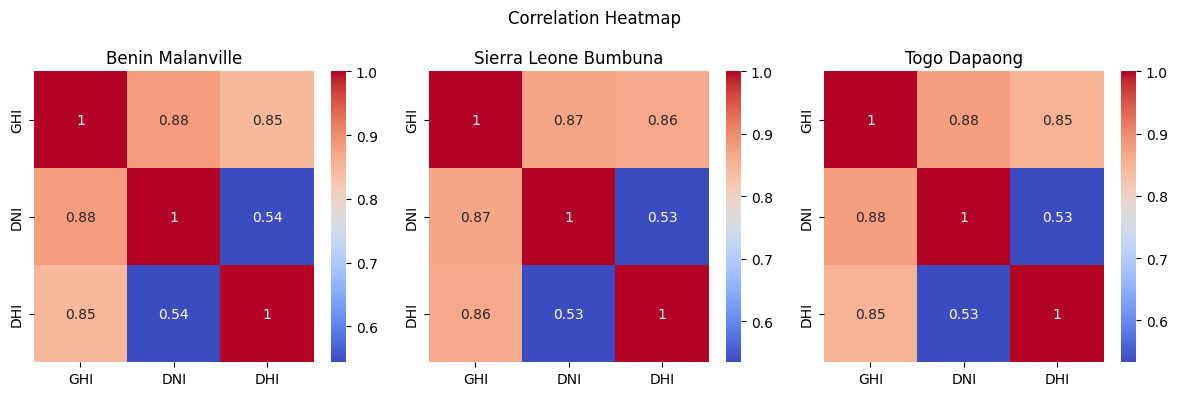

In [15]:
# correlations between solar radiation components (GHI, DNI, DHI) 

solar_radiation_columns = ['GHI', 'DNI', 'DHI']

plot_correlation_heatmap([benin_malaniville_data[solar_radiation_columns], 
                          sierra_leone_bumbuna_data[solar_radiation_columns], 
                          togo_dapaong_data[solar_radiation_columns]], names)

There is a high correlation between GHI and DNI, and GHI and DHI but less correlation between DHI and DNI.

### temperature measures (TModA, TModB)

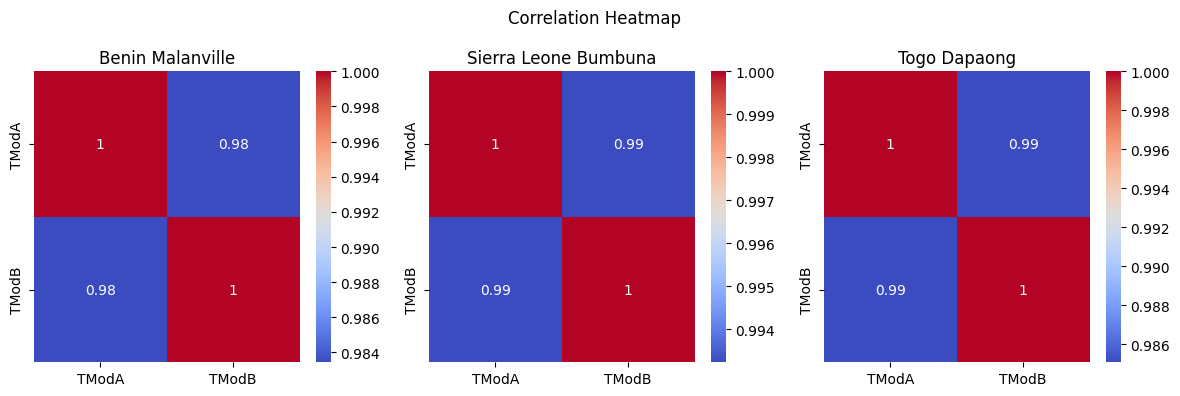

In [16]:
# temperature measures (TModA, TModB)
temperature_columns = ['TModA', 'TModB']
plot_correlation_heatmap([benin_malaniville_data[temperature_columns], 
                          sierra_leone_bumbuna_data[temperature_columns], 
                          togo_dapaong_data[temperature_columns]], names)

Very high(0.98-0.99) correlation between TModB and TModA indicating that having one of them could be enough.

### relationship between wind conditions (WS, WSgust, WD)

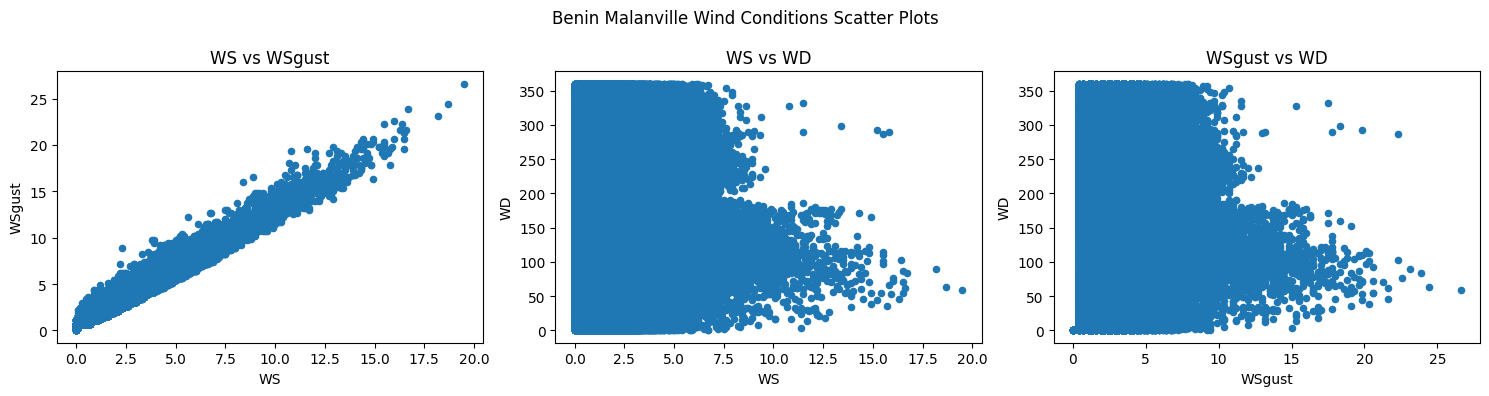

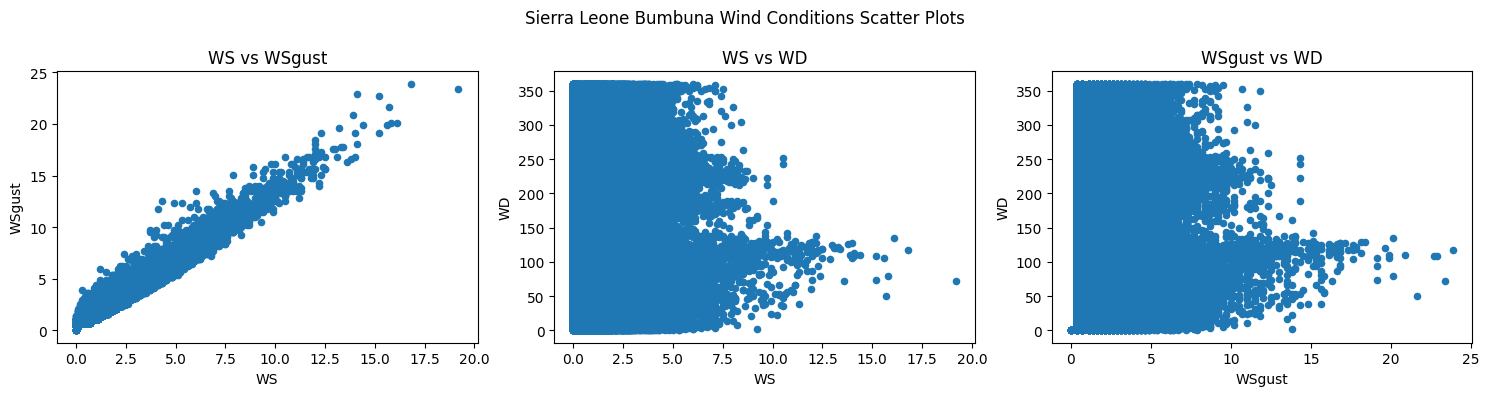

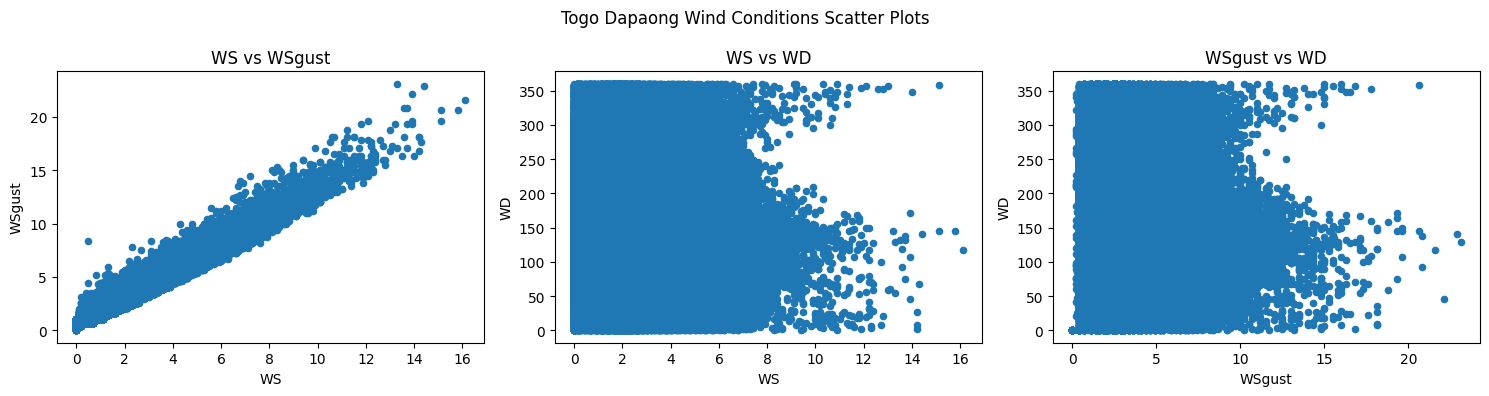

In [17]:
wind_columns = ['WS', 'WSgust', 'WD']
for data, name in zip([benin_malaniville_data, sierra_leone_bumbuna_data, togo_dapaong_data], names):
    plot_scatter(data, wind_columns, name)

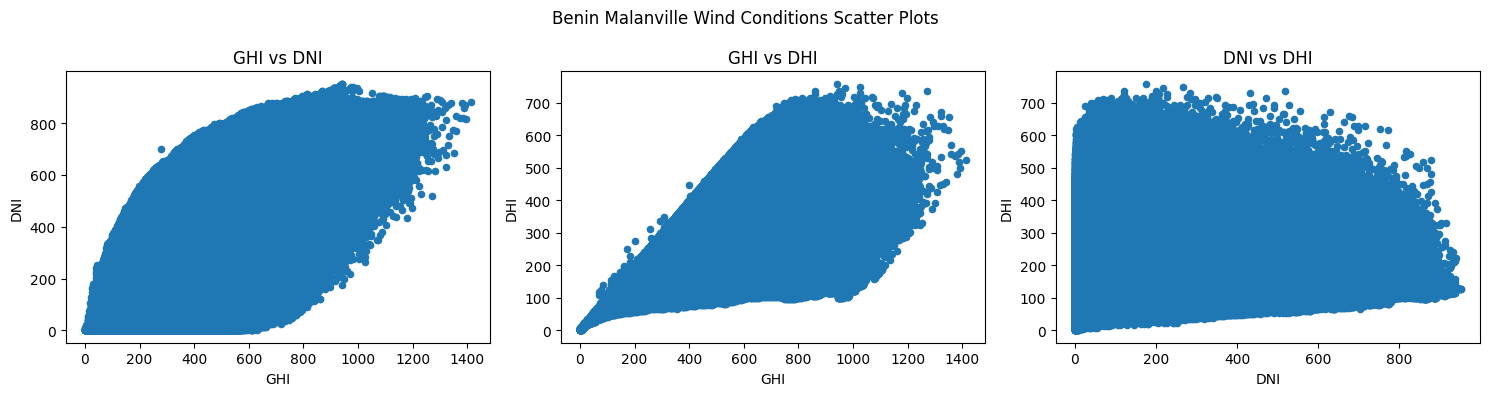

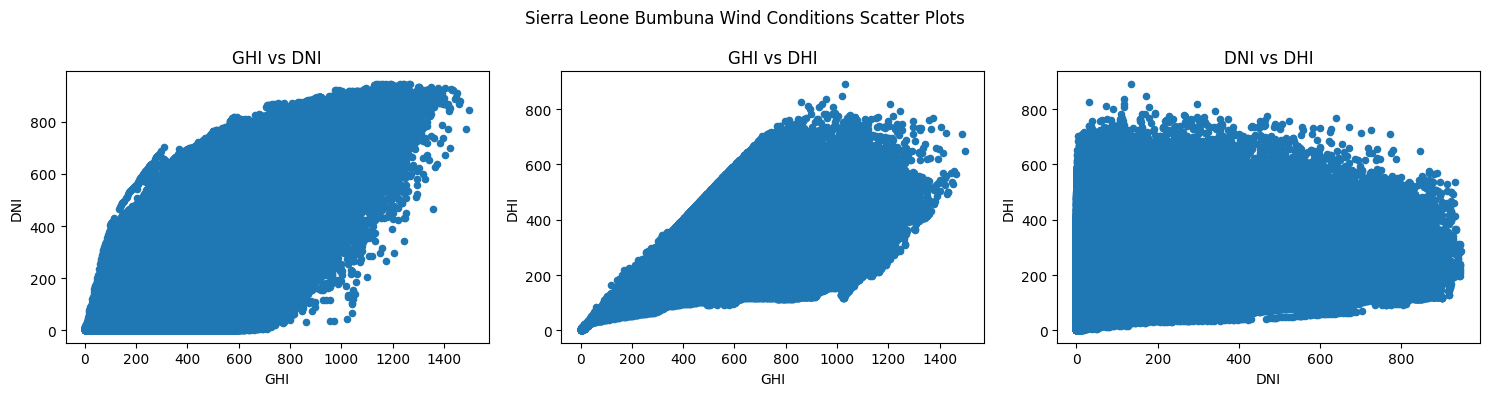

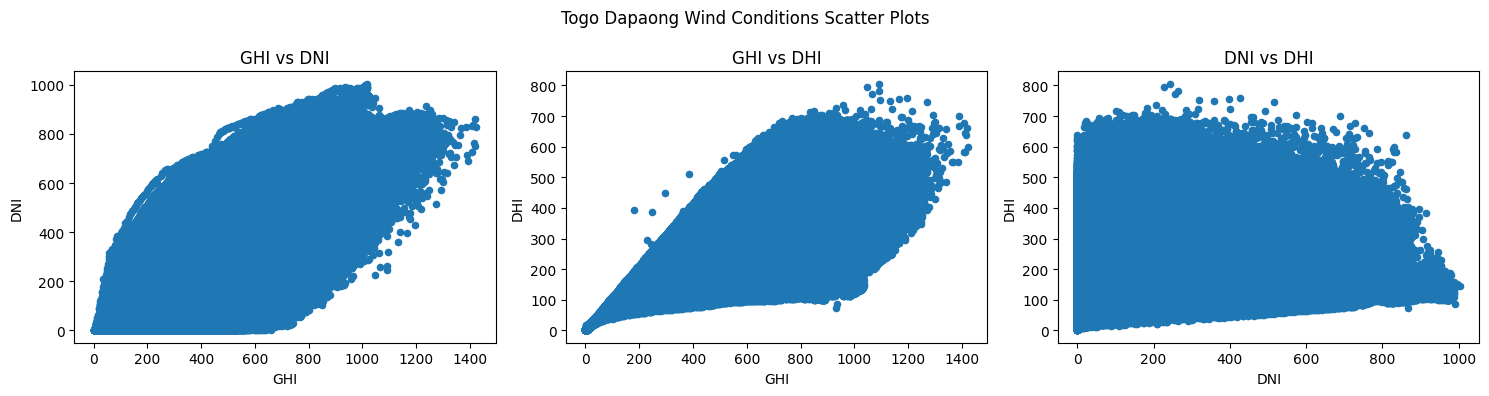

In [18]:
# Relationship between solar irradiance columns
for data, name in zip([benin_malaniville_data, sierra_leone_bumbuna_data, togo_dapaong_data], names):
    plot_scatter(data, solar_radiation_columns, name)